In [1]:
import pandas as pd
import joblib
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter('ignore')
pd.options.mode.chained_assignment=None

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#RF-с-подбором-гиперпараметров" data-toc-modified-id="RF-с-подбором-гиперпараметров-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>RF с подбором гиперпараметров</a></span></li><li><span><a href="#LogReg-с-подбором-гиперпараметров" data-toc-modified-id="LogReg-с-подбором-гиперпараметров-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LogReg с подбором гиперпараметров</a></span></li><li><span><a href="#SVC-с-подбором-гиперпараметров" data-toc-modified-id="SVC-с-подбором-гиперпараметров-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>SVC с подбором гиперпараметров</a></span></li><li><span><a href="#KNN-с-подбором-гиперпараметров" data-toc-modified-id="KNN-с-подбором-гиперпараметров-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>KNN с подбором гиперпараметров</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#LDA" data-toc-modified-id="LDA-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>LDA</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Не хочется терять около 10% удалением пропущенных данных. поэтому заполним пропущенные значения у признака 'Tenure' интерполяцией.

In [5]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median(axis=0))

Создадим новую таблицу, позволяющую соотнести ID клиента и его фамилию.

In [6]:
clients = pd.DataFrame(data=[df['CustomerId'], df['Surname']]).T
clients.head()

,CustomerId,Surname
0,15634602,Hargrave
1,15647311,Hill
2,15619304,Onio
3,15701354,Boni
4,15737888,Mitchell


Удалим неинформативные для последующего анализа признаки:

In [7]:
df = df.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)

Выведем pairplot для количественных признаков:

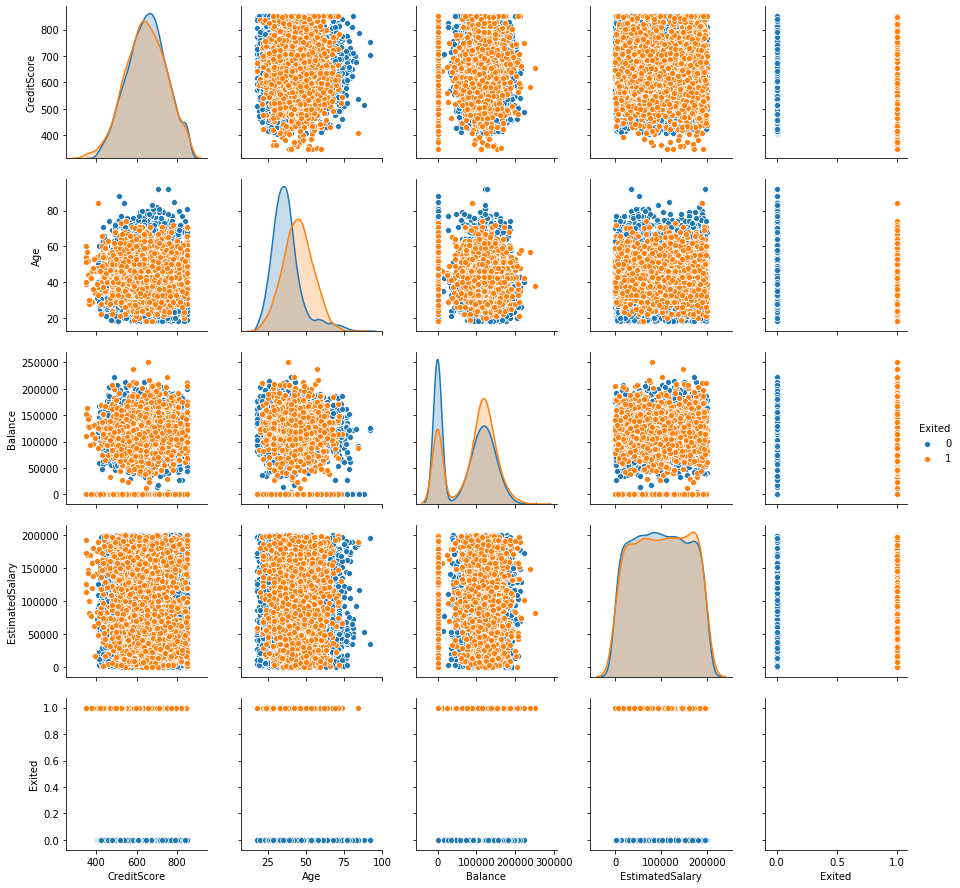

In [8]:
sns.pairplot(df[['CreditScore','Age', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited')

Воспользуемся техникой One Hot Encoding для перевода номинальных категориальных признаков в количественные:

In [9]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Разделение на выборки:

In [10]:
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)
features.shape, target.shape

((10000, 11), (10000,))

Разделим выборку на обучающую, валидационную и тестовую

In [11]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

Масштабируем численные признаки:

In [12]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.shape

(6000, 11)

In [13]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.shape

(2000, 11)

In [14]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.shape

(2000, 11)

## Исследование задачи

### Random Forest

Обучим и выведем метрику accuracy для модели Random Forest

In [15]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
joblib.dump(model, 'RF.joblib')
model.score(features_valid, target_valid)

0.85

Выведем матрицу ошибок:

In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target_valid, model.predict(features_valid)))

[[1515   67]
 [ 233  185]]


Произведем рассчет F-1 меры и метрики ROC-AUC:

In [17]:
probabilities = model.predict_proba(features_valid)[:,1]

In [18]:
f1_score(target_valid, model.predict(features_valid))

0.5522388059701492

In [19]:
auc_roc = roc_auc_score(target_valid, probabilities)
auc_roc

0.8152246565730497

Построим ROC-кривую функцией ROC(M, X, y):
* M - название настроенной модели;
* X - валидационная выборка с признаками
* y - правильные ответы на валидационной выборке

In [20]:
def ROC(M, X, y):
    model = joblib.load( M +'.joblib')
    features_valid = X
    target_valid = y
    probabilities = model.predict_proba(features_valid)[:,1]
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities)

    plt.figure()

    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    # ROC-кривая случайной модели (выглядит как прямая)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    
    plt.show()

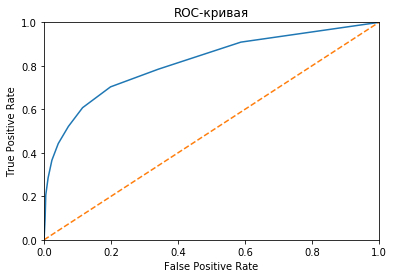

In [21]:
ROC('RF', features_valid, target_valid)

Построим кривую Precision-Recall функцией PR(M, X, y):
* M - название настроенной модели;
* X - валидационная выборка с признаками
* y - правильные ответы на валидационной выборке

In [22]:
def PR(M, X, y):
    model = joblib.load( M +'.joblib')
    features_valid = X
    target_valid = y
    probabilities_valid = model.predict_proba(features_valid)
    precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

    plt.figure(figsize=(6, 6))
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Кривая Precision-Recall')
    plt.show()  

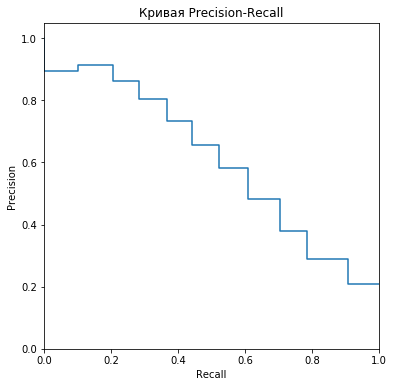

In [23]:
PR('RF', features_valid, target_valid)

## Борьба с дисбалансом

Покажем, что целевой признак имеет дисбаланс классов:

In [24]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Upsampling

In [25]:
def upsample(features, target, repeat):
    features_0 = features[target==0]
    features_1 = features[target==1]
    target_0 =  target[target==0]
    target_1 =  target[target==1]
    features_upsampled = pd.concat( [features_0] + [features_1]*repeat)
    target_upsampled = pd.concat( [target_0] + [target_1]*repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [26]:
repeat = math.ceil(target[target==0].shape[0]/target[target==1].shape[0])
repeat

4

In [27]:
features_upsampled, target_upsampled = upsample(features_train, target_train, repeat)
features_upsampled.shape, target_upsampled.shape

((9588, 11), (9588,))

In [28]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
joblib.dump(model, 'RF_upsampled.joblib')
model.score(features_valid, target_valid)

0.845

In [29]:
f1_score(target_valid, model.predict(features_valid))

0.5822102425876011

F-1 мера повысилась

In [30]:
roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

0.8090630840980165

roc_auc увеличился

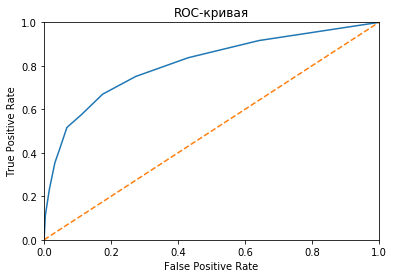

In [31]:
ROC('RF_upsampled', features_valid, target_valid)

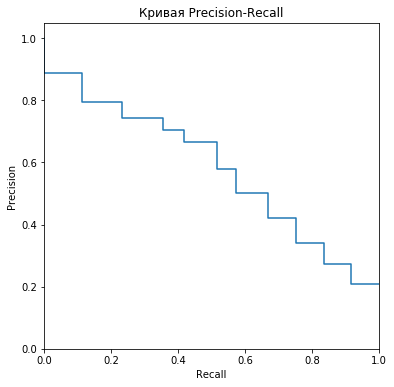

In [32]:
PR('RF_upsampled', features_valid, target_valid)

### Downsampling

In [33]:
def downsample(features, target, fraction):
    features_0 = features[target==0]
    features_1 = features[target==1]
    target_0 =  target[target==0]
    target_1 =  target[target==1]
    features_downsampled = pd.concat( [features_0.sample(frac=fraction, random_state=12345)] + [features_1])
    target_downsampled = pd.concat( [target_0.sample(frac=fraction, random_state=12345)] + [target_1])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [34]:
fraction = 1/repeat
features_downsampled, target_downsampled = downsample(features_train, target_train, fraction)

In [35]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
joblib.dump(model, 'RF_downsampled.joblib')
model.score(features_valid, target_valid)

0.784

In [36]:
f1_score(target_valid, model.predict(features_valid))

0.5764705882352942

F-1 мера понизилась

In [37]:
roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

0.8319945075883595

AUC-ROC метрика - увеличилась

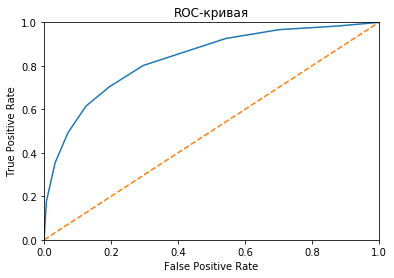

In [38]:
ROC('RF_downsampled', features_valid, target_valid)

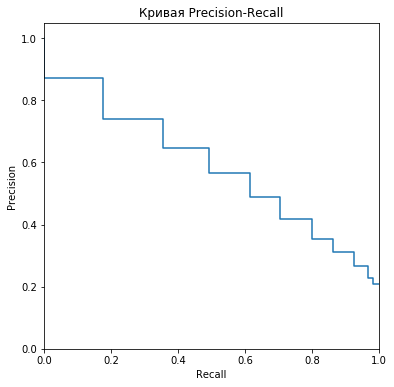

In [39]:
PR('RF_downsampled', features_valid, target_valid)

### Взвешивание классов

In [40]:
model = RandomForestClassifier(class_weight='balanced', random_state=12345)
model.fit(features_train, target_train)
joblib.dump(model, 'RF_weighted.joblib')
model.score(features_valid, target_valid), f1_score(target_valid, model.predict(features_valid)), roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

(0.8505, 0.5449010654490106, 0.8063100732523183)

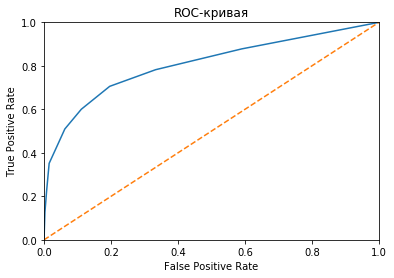

In [41]:
ROC('RF_weighted', features_valid, target_valid)

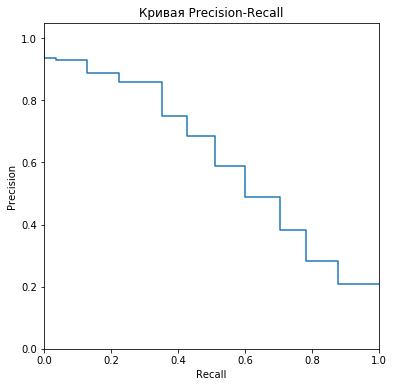

In [42]:
PR('RF_weighted', features_valid, target_valid)

### RF с подбором гиперпараметров

In [43]:
%%time
best_score = 0
for n_estimators in range(1,100,5):
    for criterion in {'gini', 'entropy'}:
        for min_samples_split in range(2,10,2):
                model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion,
                                               min_samples_split=min_samples_split, n_jobs=-1, random_state=12345)
                model.fit(features_upsampled, target_upsampled)
                score = f1_score(target_valid, model.predict(features_valid))
                if score > best_score:
                    best_score = score
                    best_params = (n_estimators, criterion, min_samples_split)
                    best_model_RF = model
joblib.dump(best_model_RF, 'best_model_RF.joblib')
print(best_score, best_params)

0.623921085080148 (31, 'entropy', 8)
CPU times: user 1min 24s, sys: 248 ms, total: 1min 25s
Wall time: 2min 2s


Для лучшей RF модели, AUC-ROC увеличилась

In [44]:
model = joblib.load('best_model_RF.joblib')
roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

0.8430587228328261

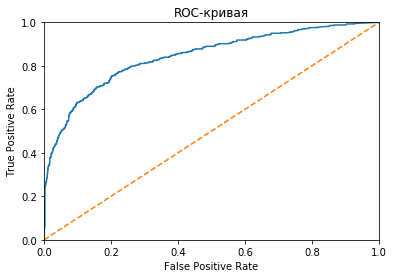

In [45]:
ROC('best_model_RF', features_valid, target_valid)

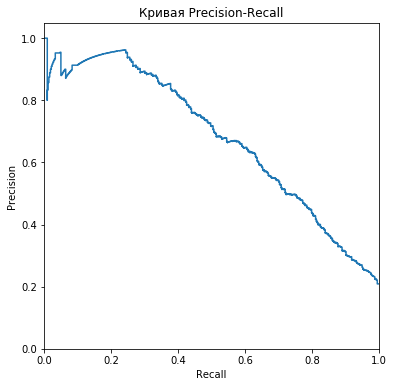

In [46]:
PR('best_model_RF', features_valid, target_valid)

Кривая P-R заметно сгладилась в сравнении с моделью RF без настройки гиперпараметров.

### LogReg с подбором гиперпараметров

In [47]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
model.score(features_valid, target_valid), f1_score(target_valid, model.predict(features_valid))

(0.802, 0.33108108108108103)

In [48]:
roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

0.7587512627102753

In [49]:
%%time
best_score = 0
for solver in {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}: 
    for multi_class in {'auto', 'ovr', 'multinomial'}:
        for penalty in {'l1', 'l2', 'elasticnet', 'none'}:
            for tol in [1e-4, 1e-3, 1e-5]:
                for max_iter in [50, 100]:
                    for C in np.logspace(-4, 4, 4):
                        try:
                            model = LogisticRegression(penalty=penalty, multi_class=multi_class, solver=solver,
                                                       tol=tol, max_iter=max_iter,C=C, n_jobs=-1)
                            model.fit(features_upsampled, target_upsampled)
                            score = f1_score(target_valid, model.predict(features_valid))
                            if score > best_score:
                                best_score = score
                                best_params = (solver, multi_class, penalty, tol, max_iter, C)
                                best_model_LogReg = model             
                        except:
                            None
joblib.dump(best_model_LogReg, 'best_model_LogReg.joblib')
print(best_score, best_params)

0.5110913930789707 ('lbfgs', 'multinomial', 'l2', 0.0001, 50, 0.0001)
CPU times: user 1min 27s, sys: 1min 31s, total: 2min 59s
Wall time: 3min 35s


In [50]:
model = joblib.load('best_model_LogReg.joblib')
roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

0.7640228890811099

In [51]:
model = joblib.load('best_model_LogReg.joblib')
probabilities_one_valid = model.predict_proba(features_valid)[:,1]
for threshold in np.arange(0, 1, 0.05):
    predicted_valid = probabilities_one_valid > threshold   
    precision = precision_score(target_valid, predicted_valid)
    recall =  recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1-мера = {:.3f}".format(
        threshold, precision, recall, f1))

Порог = 0.00 | Точность = 0.209, Полнота = 1.000, F1-мера = 0.346
Порог = 0.05 | Точность = 0.209, Полнота = 1.000, F1-мера = 0.346
Порог = 0.10 | Точность = 0.209, Полнота = 1.000, F1-мера = 0.346
Порог = 0.15 | Точность = 0.209, Полнота = 1.000, F1-мера = 0.346
Порог = 0.20 | Точность = 0.209, Полнота = 1.000, F1-мера = 0.346
Порог = 0.25 | Точность = 0.209, Полнота = 1.000, F1-мера = 0.346
Порог = 0.30 | Точность = 0.209, Полнота = 1.000, F1-мера = 0.346
Порог = 0.35 | Точность = 0.211, Полнота = 1.000, F1-мера = 0.348
Порог = 0.40 | Точность = 0.225, Полнота = 0.988, F1-мера = 0.367
Порог = 0.45 | Точность = 0.279, Полнота = 0.897, F1-мера = 0.426
Порог = 0.50 | Точность = 0.406, Полнота = 0.689, F1-мера = 0.511
Порог = 0.55 | Точность = 0.513, Полнота = 0.376, F1-мера = 0.434
Порог = 0.60 | Точность = 0.438, Полнота = 0.110, F1-мера = 0.176
Порог = 0.65 | Точность = 0.290, Полнота = 0.022, F1-мера = 0.040
Порог = 0.70 | Точность = 0.000, Полнота = 0.000, F1-мера = 0.000
Порог = 0.

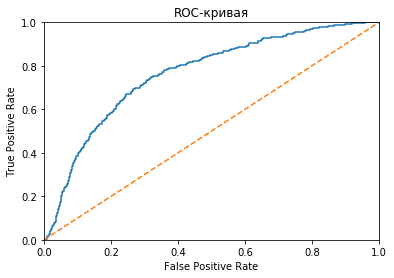

In [52]:
ROC('best_model_LogReg', features_valid, target_valid)

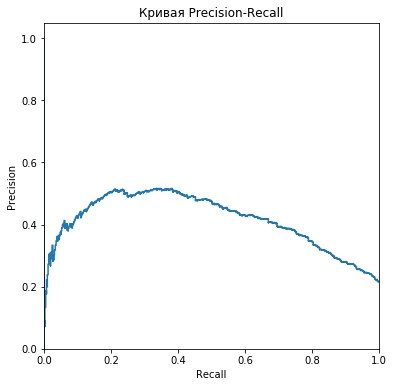

In [53]:
PR('best_model_LogReg', features_valid, target_valid)

### SVC с подбором гиперпараметров

In [54]:
model = SVC(random_state=12345, probability=True)
model.fit(features_train, target_train)
model.score(features_valid, target_valid), f1_score(target_valid, model.predict(features_valid))

(0.855, 0.5292207792207793)

In [55]:
roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

0.8307869936304964

In [56]:
%%time
best_score = 0
for C in [1e-4, 1]:
    for kernel in {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed', 'rbf'}:
        for decision_function_shape in {'ovo', 'ovr'}:
            try:
                model = SVC(C=C, kernel=kernel,
                            decision_function_shape=decision_function_shape, random_state=12345,
                            probability=True)
                model.fit(features_upsampled, target_upsampled)
                score = f1_score(target_valid, model.predict(features_valid))
                if score > best_score:
                    best_score = score
                    best_params = (C, kernel, decision_function_shape)
                    best_model_SVC = model
            except:
                None
joblib.dump(best_model_SVC, 'best_model_SVC.joblib')
print(best_score, best_params)


0.5938104448742747 (1, 'rbf', 'ovr')
CPU times: user 4min 43s, sys: 4.02 s, total: 4min 47s
Wall time: 5min


In [57]:
1

1

In [58]:
model = joblib.load('best_model_SVC.joblib')
roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

0.8428772554878748

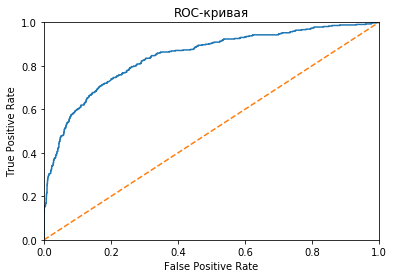

In [59]:
ROC('best_model_SVC', features_valid, target_valid)

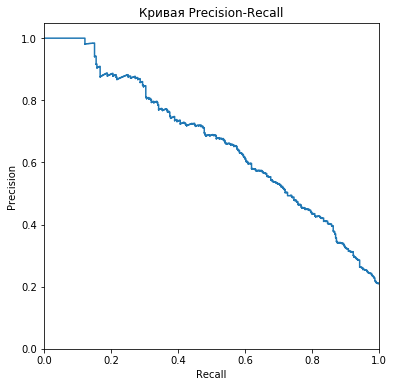

In [60]:
PR('best_model_SVC', features_valid, target_valid)

### KNN с подбором гиперпараметров

In [61]:
model = KNeighborsClassifier()
model.fit(features_train, target_train)
model.score(features_valid, target_valid), f1_score(target_valid, model.predict(features_valid))

(0.847, 0.5526315789473685)

In [62]:
roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

0.7933041574168728

In [63]:
%%time
best_score = 0
for n_neighbors in range(1, 20, 2):
    for algorithm in {'auto', 'ball_tree', 'kd_tree', 'brute'}:
        for metric in {'euclidean', 'manhattan', 'chebyshev'}:
            model = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm=algorithm, metric=metric)
            model.fit(features_upsampled, target_upsampled)
            score = f1_score(target_valid, model.predict(features_valid))
            if score > best_score:
                best_score = score
                best_params = (n_neighbors, algorithm, metric)
                best_model_KNN = model
joblib.dump(best_model_KNN, 'best_model_KNN.joblib')
print(best_score, best_params)

0.5687885010266941 (9, 'ball_tree', 'manhattan')
CPU times: user 32.7 s, sys: 2.84 s, total: 35.5 s
Wall time: 36 s


In [64]:
model = joblib.load('best_model_KNN.joblib')
roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

0.793778240855558

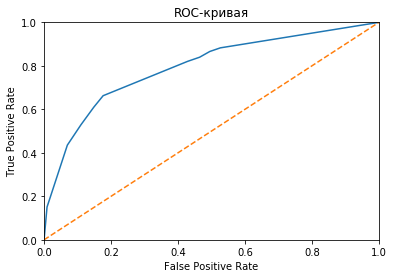

In [65]:
ROC('best_model_KNN', features_valid, target_valid)

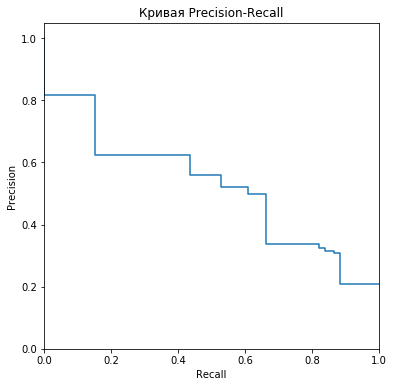

In [66]:
PR('best_model_KNN', features_valid, target_valid)

### Naive Bayes

In [67]:
model = GaussianNB()
model.fit(features_train, target_train)
model.score(features_valid, target_valid), f1_score(target_valid, model.predict(features_valid))

(0.808, 0.4268656716417911)

In [68]:
roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

0.7849430494982429

In [69]:
model = GaussianNB()
model.fit(features_upsampled, target_upsampled)
joblib.dump(model, 'Naive_Bayes.joblib')
model.score(features_valid, target_valid), f1_score(target_valid, model.predict(features_valid))

(0.714, 0.5051903114186851)

In [70]:
roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

0.7849430494982429

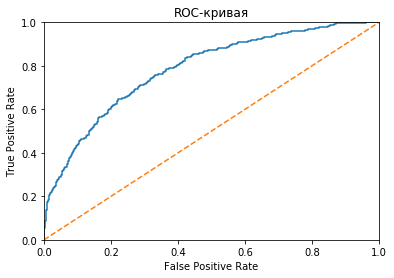

In [71]:
ROC('Naive_Bayes', features_valid, target_valid)

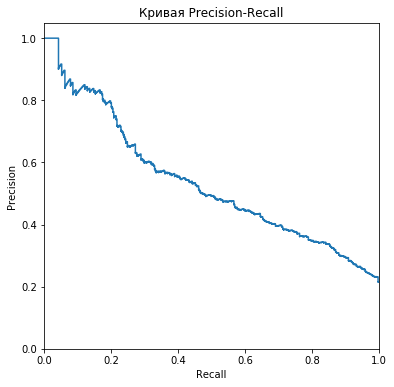

In [72]:
PR('Naive_Bayes', features_valid, target_valid)

### LDA

In [73]:
model = LinearDiscriminantAnalysis()
model.fit(features_train, target_train)
model.score(features_valid, target_valid), f1_score(target_valid, model.predict(features_valid))

(0.7975, 0.34782608695652173)

In [74]:
roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

0.7613825392120688

In [75]:
model = LinearDiscriminantAnalysis()
model.fit(features_upsampled, target_upsampled)
joblib.dump(model, 'LDA.joblib')
model.score(features_valid, target_valid), f1_score(target_valid, model.predict(features_valid))

(0.7035, 0.48835202761000857)

In [76]:
roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

0.7632592140044399

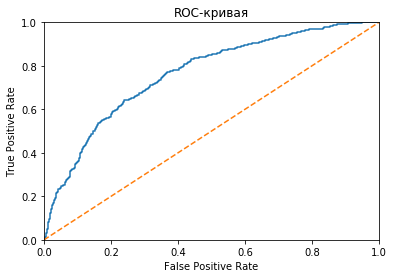

In [77]:
ROC('LDA', features_valid, target_valid)

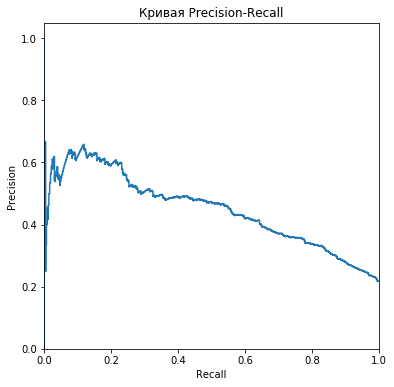

In [78]:
PR('LDA', features_valid, target_valid)

In [79]:
print("Модель  {:<12}".format(' '), 'Accuracy', 'F-1', 'AUC_ROC')
for m in ['RF', 'RF_upsampled', 'RF_downsampled', 'RF_weighted', 'best_model_RF', 'best_model_LogReg', 'best_model_SVC', 'best_model_KNN',
         'Naive_Bayes', 'LDA']:
    model = joblib.load(m+'.joblib')
    print("{:<20}".
          format(m), "  {:.2f}, {:.2f}, {:.2f}".format(model.score(features_valid, target_valid),
                                                            f1_score(target_valid, model.predict(features_valid)),
                                                            roc_auc_score(target_valid,
                                                                          model.predict_proba(features_valid)[:,1])))                                     

Модель               Accuracy F-1 AUC_ROC
RF                     0.85, 0.55, 0.82
RF_upsampled           0.84, 0.58, 0.81
RF_downsampled         0.78, 0.58, 0.83
RF_weighted            0.85, 0.54, 0.81
best_model_RF          0.85, 0.62, 0.84
best_model_LogReg      0.72, 0.51, 0.76
best_model_SVC         0.79, 0.59, 0.84
best_model_KNN         0.79, 0.57, 0.79
Naive_Bayes            0.71, 0.51, 0.78
LDA                    0.70, 0.49, 0.76


## Тестирование модели

Для тестирования оставим только модели с F-1 мерой больше 0.55:

In [80]:
for m in ['best_model_RF', 'RF_upsampled', 'RF_downsampled', 'RF_weighted', 'best_model_SVC', 'best_model_KNN']:
    model = joblib.load(m+'.joblib')
    print("Качество модели на тестовой выборке (accuracy, F-1, AUC_ROC): {:<20}".format(m), "  {:.2f}, {:.2f}, {:.2f}".format(model.score(features_test, target_test), f1_score(target_test, model.predict(features_test)), roc_auc_score(target_test, model.predict_proba(features_test)[:,1])))                                     

Качество модели на тестовой выборке (accuracy, F-1, AUC_ROC): best_model_RF          0.84, 0.60, 0.84
Качество модели на тестовой выборке (accuracy, F-1, AUC_ROC): RF_upsampled           0.83, 0.55, 0.82
Качество модели на тестовой выборке (accuracy, F-1, AUC_ROC): RF_downsampled         0.77, 0.55, 0.81
Качество модели на тестовой выборке (accuracy, F-1, AUC_ROC): RF_weighted            0.84, 0.49, 0.80
Качество модели на тестовой выборке (accuracy, F-1, AUC_ROC): best_model_SVC         0.80, 0.60, 0.85
Качество модели на тестовой выборке (accuracy, F-1, AUC_ROC): best_model_KNN         0.78, 0.55, 0.79


### Вывод:
Проведено преобразование категориальных признаков в численные; масштабирование.
Проведено тестирование различных моделей классификации с учетом и без учета дисбаланса классов. Подсчитаны метрики качества: accuracy, F-1, AUC_ROC. Удалость добиться значения F-1 на тестовой выборке не менее 0.59 для моделей c учетом дисбаланса классов: best_model_RF, best_model_SVC.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*